#Porfilio Trujillo Martinez


##Cuadro

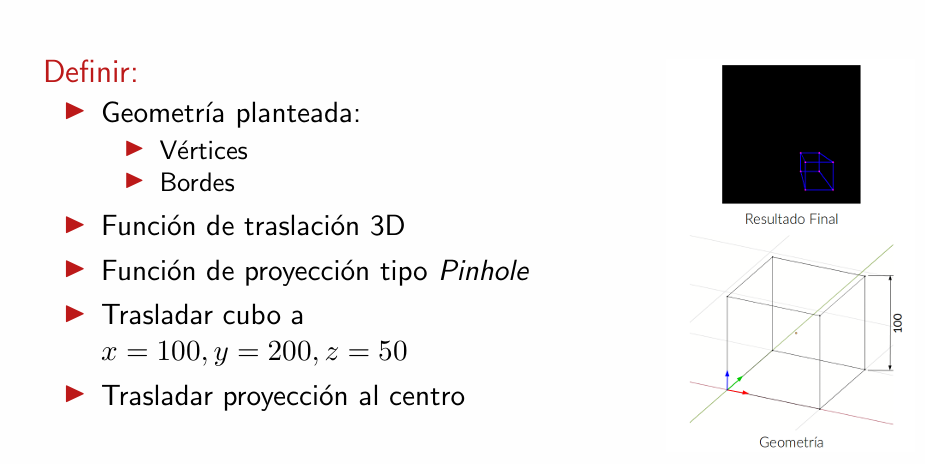

##Importar librerias

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow


In [2]:
# Funciones
def dibujar_cubo(vertices, edges, im):
#Dibuja objeto definido por vertices y bordes
    # Normalizar coordenadas homogeneas
    v_h = np.array([ v[:-2]/v[-1] for v in vertices])
    for e in edges:
        cv.line(im, tuple(v_h[e[0]].astype(int)),
                    tuple(v_h[e[1]].astype(int)), (255,0,15), 2)
    for v in v_h:
        cv.circle(im, tuple(v.astype(int)), 3, (255,0,255),-1)

In [3]:
def translate3d(vertex, dx, dy, dz):
  tresd = np.array([[1,0,0,dx],[0,1,0,dy],[0,0,1,dz],[0,0,0,1]])
  v = tresd @ vertex.T
  return v.T

In [4]:

#Operación de traslación 3d
def project2D(vertex, f=35):
#Aplica una transformacion de proyeccion pinhole
  projt = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,1,0],
                  [0,0,(1/f),1]])
  v1 = projt @ vertex.T
  return v1.T

## Definir geometria

In [18]:
# Cubo definido en su sistema coordenado
# Lista de vertices [[x, y, z,1], ...
# List de bordes que relacionan los indices de los vertices
# [(0,1), (1,2), ....

vertices = np.array([[0,100,100,1],
               [0,100,0,1],
              [100,100,0,1],
               [100,0,0,1],
              [100,0,100,1],
               [0,0,100,1],
                [0,0,0,1],
              [100,100,100,1]])

bordes = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,0),(5,6),(1,6),(6,3),(7,4),(0,7),(7,2)]

## Parametros camara

In [19]:
Distancia_focal = 200   # Distancia_focal

# Tamano imagen
Tamano_x = 500
Tamano_y = 500

## Proyectar 3D -> 2D

In [34]:
vp = translate3d(vertices,100,100,20)
Proyectar_3D = project2D(vp,Distancia_focal)


## Dibujar y mostrar

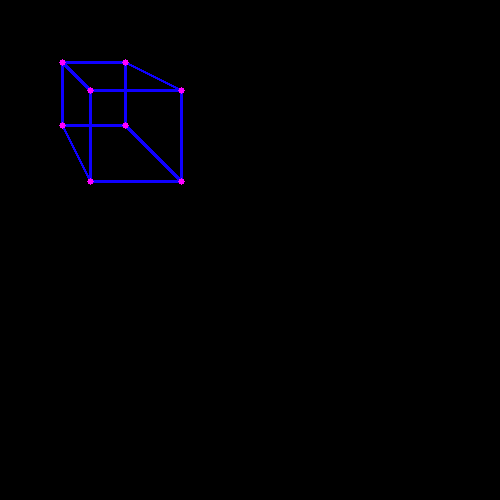

In [35]:
imagen_cubo = np.zeros((Tamano_y,Tamano_x,3), np.uint8)
dibujar_cubo(Proyectar_3D , bordes, imagen_cubo)
cv2_imshow(imagen_cubo)